In [245]:
#Load Library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [246]:
data = pd.read_csv('dataset.csv')
data

,No.,Nama Produk,Deskripsi,Total Pesanan,Harga Barang,Gerindra,Obat,Amplas,Scotch Brite,Packing,Total Harga
0,1,Stoel Joey,Sedang,50.0,Mahal,Sedang,Kecil,Besar,Sedang,Sedang,Mahal
1,2,Bank Joey 120,Sedang,30.0,Sedang,Kecil,Kecil,Kecil,Kecil,Kecil,Murah
2,3,Bank Joey 150,Sedang,30.0,Mahal,Sedang,Sedang,Kecil,Kecil,Kecil,Mahal
3,4,Bank Joey 180,Sedang,30.0,Mahal,Sedang,Kecil,Besar,Kecil,Kecil,Mahal
4,5,Ligbed Kathleen,Besar,60.0,Mahal,Besar,Besar,Sedang,Sedang,Sedang,Mahal
5,6,Ligbed Valerie,Besar,60.0,Mahal,Sedang,Besar,Sedang,Sedang,Sedang,Mahal
6,7,Tafel Monica 90x180,Sedang,35.0,Mahal,Sedang,Sedang,Kecil,Kecil,Kecil,Murah
7,8,Tafel Blad Recht 100x200,Sedang,50.0,Mahal,Sedang,Sedang,Sedang,Sedang,Sedang,Murah
8,9,Deckschair Dessy,Murah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Tafel Catalena 90/180,Sedang,50.0,Mahal,Sedang,Besar,Sedang,Sedang,Sedang,Mahal


In [247]:
# drop data yang kosong
data = data.dropna()
data = data.drop('Nama Produk', axis=1)

data

,No.,Deskripsi,Total Pesanan,Harga Barang,Gerindra,Obat,Amplas,Scotch Brite,Packing,Total Harga
0,1,Sedang,50.0,Mahal,Sedang,Kecil,Besar,Sedang,Sedang,Mahal
1,2,Sedang,30.0,Sedang,Kecil,Kecil,Kecil,Kecil,Kecil,Murah
2,3,Sedang,30.0,Mahal,Sedang,Sedang,Kecil,Kecil,Kecil,Mahal
3,4,Sedang,30.0,Mahal,Sedang,Kecil,Besar,Kecil,Kecil,Mahal
4,5,Besar,60.0,Mahal,Besar,Besar,Sedang,Sedang,Sedang,Mahal
5,6,Besar,60.0,Mahal,Sedang,Besar,Sedang,Sedang,Sedang,Mahal
6,7,Sedang,35.0,Mahal,Sedang,Sedang,Kecil,Kecil,Kecil,Murah
7,8,Sedang,50.0,Mahal,Sedang,Sedang,Sedang,Sedang,Sedang,Murah
9,10,Sedang,50.0,Mahal,Sedang,Besar,Sedang,Sedang,Sedang,Mahal
10,11,Sedang,50.0,Mahal,Sedang,Sedang,Kecil,Kecil,Sedang,Murah


In [248]:
# Feature Engineering & Data Integration
data = pd.get_dummies(data, columns=['Deskripsi'])
data

,No.,Total Pesanan,Harga Barang,Gerindra,Obat,Amplas,Scotch Brite,Packing,Total Harga,Deskripsi_Besar,Deskripsi_Sedang
0,1,50.0,Mahal,Sedang,Kecil,Besar,Sedang,Sedang,Mahal,False,True
1,2,30.0,Sedang,Kecil,Kecil,Kecil,Kecil,Kecil,Murah,False,True
2,3,30.0,Mahal,Sedang,Sedang,Kecil,Kecil,Kecil,Mahal,False,True
3,4,30.0,Mahal,Sedang,Kecil,Besar,Kecil,Kecil,Mahal,False,True
4,5,60.0,Mahal,Besar,Besar,Sedang,Sedang,Sedang,Mahal,True,False
5,6,60.0,Mahal,Sedang,Besar,Sedang,Sedang,Sedang,Mahal,True,False
6,7,35.0,Mahal,Sedang,Sedang,Kecil,Kecil,Kecil,Murah,False,True
7,8,50.0,Mahal,Sedang,Sedang,Sedang,Sedang,Sedang,Murah,False,True
9,10,50.0,Mahal,Sedang,Besar,Sedang,Sedang,Sedang,Mahal,False,True
10,11,50.0,Mahal,Sedang,Sedang,Kecil,Kecil,Sedang,Murah,False,True


In [249]:
# Konversi label kategori pada kolom 'Harga Barang' menjadi numerik
harga_barang_mapping = {'Murah': 0, 'Sedang': 1, 'Mahal': 2}
data['Harga Barang'] = data['Harga Barang'].map(harga_barang_mapping)
data

,No.,Total Pesanan,Harga Barang,Gerindra,Obat,Amplas,Scotch Brite,Packing,Total Harga,Deskripsi_Besar,Deskripsi_Sedang
0,1,50.0,2,Sedang,Kecil,Besar,Sedang,Sedang,Mahal,False,True
1,2,30.0,1,Kecil,Kecil,Kecil,Kecil,Kecil,Murah,False,True
2,3,30.0,2,Sedang,Sedang,Kecil,Kecil,Kecil,Mahal,False,True
3,4,30.0,2,Sedang,Kecil,Besar,Kecil,Kecil,Mahal,False,True
4,5,60.0,2,Besar,Besar,Sedang,Sedang,Sedang,Mahal,True,False
5,6,60.0,2,Sedang,Besar,Sedang,Sedang,Sedang,Mahal,True,False
6,7,35.0,2,Sedang,Sedang,Kecil,Kecil,Kecil,Murah,False,True
7,8,50.0,2,Sedang,Sedang,Sedang,Sedang,Sedang,Murah,False,True
9,10,50.0,2,Sedang,Besar,Sedang,Sedang,Sedang,Mahal,False,True
10,11,50.0,2,Sedang,Sedang,Kecil,Kecil,Sedang,Murah,False,True


In [250]:
besaran = {'Kecil': 0, 'Sedang': 1, 'Besar': 2}
data['Scotch Brite'] = data['Scotch Brite'].map(besaran)
data['Obat'] = data['Obat'].map(besaran)
data['Gerindra'] = data['Gerindra'].map(besaran)
data['Amplas'] = data['Amplas'].map(besaran)
data['Packing'] = data['Packing'].map(besaran)
data

,No.,Total Pesanan,Harga Barang,Gerindra,Obat,Amplas,Scotch Brite,Packing,Total Harga,Deskripsi_Besar,Deskripsi_Sedang
0,1,50.0,2,1,0,2,1,1,Mahal,False,True
1,2,30.0,1,0,0,0,0,0,Murah,False,True
2,3,30.0,2,1,1,0,0,0,Mahal,False,True
3,4,30.0,2,1,0,2,0,0,Mahal,False,True
4,5,60.0,2,2,2,1,1,1,Mahal,True,False
5,6,60.0,2,1,2,1,1,1,Mahal,True,False
6,7,35.0,2,1,1,0,0,0,Murah,False,True
7,8,50.0,2,1,1,1,1,1,Murah,False,True
9,10,50.0,2,1,2,1,1,1,Mahal,False,True
10,11,50.0,2,1,1,0,0,1,Murah,False,True


In [251]:
totalharga = {'Murah': 1, 'Mahal': 2}
data['Total Harga'] = data['Total Harga'].map(totalharga)
data

,No.,Total Pesanan,Harga Barang,Gerindra,Obat,Amplas,Scotch Brite,Packing,Total Harga,Deskripsi_Besar,Deskripsi_Sedang
0,1,50.0,2,1,0,2,1,1,2,False,True
1,2,30.0,1,0,0,0,0,0,1,False,True
2,3,30.0,2,1,1,0,0,0,2,False,True
3,4,30.0,2,1,0,2,0,0,2,False,True
4,5,60.0,2,2,2,1,1,1,2,True,False
5,6,60.0,2,1,2,1,1,1,2,True,False
6,7,35.0,2,1,1,0,0,0,1,False,True
7,8,50.0,2,1,1,1,1,1,1,False,True
9,10,50.0,2,1,2,1,1,1,2,False,True
10,11,50.0,2,1,1,0,0,1,1,False,True


In [252]:
# Pisahkan fitur (X) dan label (y)
X = data.drop('Total Harga', axis=1)
y = data['Total Harga']

print(X)
print(y)

    No.  Total Pesanan  Harga Barang  Gerindra  Obat  Amplas  Scotch Brite  \
0     1           50.0             2         1     0       2             1   
1     2           30.0             1         0     0       0             0   
2     3           30.0             2         1     1       0             0   
3     4           30.0             2         1     0       2             0   
4     5           60.0             2         2     2       1             1   
5     6           60.0             2         1     2       1             1   
6     7           35.0             2         1     1       0             0   
7     8           50.0             2         1     1       1             1   
9    10           50.0             2         1     2       1             1   
10   11           50.0             2         1     1       0             0   

    Packing  Deskripsi_Besar  Deskripsi_Sedang  
0         1            False              True  
1         0            False              T

In [253]:
# Split dataset menjadi 80:20 untuk data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train)
print(X_test)
print(y_train)
print(y_test)

    No.  Total Pesanan  Harga Barang  Gerindra  Obat  Amplas  Scotch Brite  \
5     6           60.0             2         1     2       1             1   
0     1           50.0             2         1     0       2             1   
7     8           50.0             2         1     1       1             1   
2     3           30.0             2         1     1       0             0   
10   11           50.0             2         1     1       0             0   
4     5           60.0             2         2     2       1             1   
3     4           30.0             2         1     0       2             0   
6     7           35.0             2         1     1       0             0   

    Packing  Deskripsi_Besar  Deskripsi_Sedang  
5         1             True             False  
0         1            False              True  
7         1            False              True  
2         0            False              True  
10        1            False              True  
4  

In [254]:
# Modelling - Pelatihan model Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Confusion Matrix:
[[0 1]
 [0 1]]


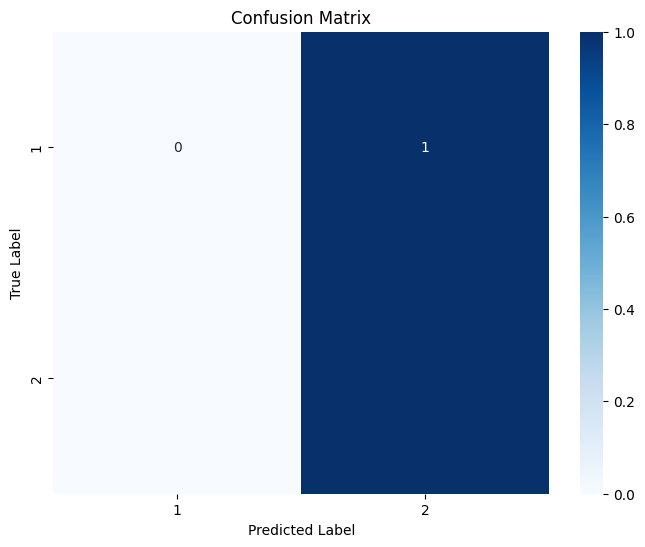

In [255]:
import warnings
warnings.filterwarnings('ignore')

# Performa Model / Uji Performa Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')
print(f'Confusion Matrix:\n{conf_matrix}')

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



In [256]:
import numpy as np

# Data Sample
data_sample = {
    'No.': [12],
    'Total Pesanan': [np.random.uniform(20, 100)],
    'Harga Barang': [np.random.choice([0, 1, 2])],
    'Gerindra': [np.random.choice([0, 1, 2])],
    'Obat': [np.random.choice([0, 1, 2])],
    'Amplas': [np.random.choice([0, 1, 2])],
    'Scotch Brite': [np.random.choice([0, 1, 2])],
    'Packing': [np.random.choice([0, 1, 2])],
    'Deskripsi_Besar': [bool(np.random.choice([True, False]))],
    'Deskripsi_Sedang': [bool(np.random.choice([True, False]))],
    'Total Harga': [np.nan]  # Biarkan kosong untuk atribut yang akan diprediksi
}

# Buat DataFrame
new_data = pd.DataFrame(data_sample)

# Tampilkan data yang dihasilkan
new_data


,No.,Total Pesanan,Harga Barang,Gerindra,Obat,Amplas,Scotch Brite,Packing,Deskripsi_Besar,Deskripsi_Sedang,Total Harga
0,12,91.119062,2,2,2,1,1,1,False,False,NaN


In [257]:
# Uji data acak
predicted_data = model.predict(new_data.drop('Total Harga', axis=1))

# Tambahkan hasil prediksi ke dalam data acak
new_data['Predicted_Total_Harga'] = predicted_data
predicted_totalharga_mapping = {0: 'Murah', 1: 'Sedang', 2: 'Mahal'}
new_data['Predicted_Total_Harga'] = new_data['Predicted_Total_Harga'].map(predicted_totalharga_mapping)

# Tampilkan hasil prediksi
print("Data Acak dengan Hasil Prediksi:")
new_data['Predicted_Total_Harga']


Data Acak dengan Hasil Prediksi:


0    Mahal
Name: Predicted_Total_Harga, dtype: object